# Compare the Risks of a Portfolio of Stocks
In this activity you will compare a basket of stocks and determine if they are risky investments compared to the SP500.

## 1. Import Modules

In [1]:
# Import Modules
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt


## 2. Set paths to `CSV` Files
  - Each csv file contains a stock's closing price and the date of the closing price.

  - Create a `Path` object for each `CSV` filepath.

In [2]:
# Set paths to csv files
hd_path = Path('../Resources/HD.csv')
intc_path = Path('../Resources/INTC.csv')
mu_path = Path('../Resources/MU.csv')
nvda_path = Path('../Resources/NVDA.csv')
tsla_path = Path('../Resources/TSLA.csv')
sp500_path = Path('../Resources/sp500.csv')

## 3. For each `CSV` file read the data into a `pandas` `DataFrame`.

  - Set the index column to be the date.

  - Infer the date time format.

  - Parse all dates when the `CSV` is loaded.

In [3]:
# Read in csv files
hd_df = pd.read_csv(
    hd_path,
    index_col='date',
    infer_datetime_format=True,
    parse_dates=True
)
intc_df = pd.read_csv(
    intc_path,
    index_col='date',
    infer_datetime_format=True,
    parse_dates=True
)
mu_df = pd.read_csv(
    mu_path,
    index_col='date',
    infer_datetime_format=True,
    parse_dates=True
)
nvda_df = pd.read_csv(
    nvda_path,
    index_col='date',
    infer_datetime_format=True,
    parse_dates=True
)
tsla_df = pd.read_csv(
    tsla_path,
    index_col='date',
    infer_datetime_format=True,
    parse_dates=True
)
sp500_df = pd.read_csv(
    sp500_path,
    index_col='date',
    infer_datetime_format=True,
    parse_dates=True
)

## 4. Concatenate the Dataframes into one `DataFrame`
  - Use an inner join.

  - Set the axis to be the columns.

In [4]:
# Concatenate the dataframes into one dataframe
assets = [hd_df, intc_df, mu_df, nvda_df, tsla_df, sp500_df]
portfolio_df = pd.concat(assets, axis=1, join='inner')

## 5. Calculate the Daily Percent Changes
  - Drop all n/a values

In [5]:
# Calculate the daily percent changes and drop n/a values
portfolio_pct_change_df = portfolio_df.pct_change().dropna()

In [6]:
# Preview the data
portfolio_pct_change_df

,hd_close,intc_close,mu_close,nvda_close,tsla_close,sp500_close
date,,,,,,
2014-05-21,0.001539,0.006144,0.016573,0.000000,0.021249,0.008116
2014-05-22,0.008965,-0.001908,0.006669,0.004386,0.027225,0.002362
2014-05-23,0.005077,0.005354,0.005889,0.009279,0.011812,0.004248
2014-05-27,0.006441,0.015976,0.026711,0.017847,0.020550,0.005988
2014-05-28,-0.000125,0.006365,0.019601,0.008502,-0.006239,-0.001114
...,...,...,...,...,...,...
2019-05-08,0.002054,-0.024564,-0.012668,0.004679,-0.008986,-0.001605
2019-05-09,-0.003023,-0.053209,-0.012075,-0.021447,-0.011681,-0.003021
2019-05-10,0.000000,-0.009009,-0.008403,-0.008050,-0.010166,0.003720


## 6. Calculate Sharpe Ratios
  - There are 252 trading days in a year

  - Calculate the average annual return

  - Calculate the annualized standard deviation


In [7]:
# There are 252 trading days in a year
trading_days = 252

### Calculate the annual average return

In [8]:
# Calculate the annual average return
annual_average_return_portfolio = portfolio_pct_change_df.mean()*trading_days

### Calculate the annualized standard deviation

In [12]:
# Calculate the annualized standard deviation
annual_std_dev_portfolio_df = portfolio_pct_change_df.std() * np.sqrt(trading_days)

### Calculate the Sharpe Ratios
  - The sharp ratio is ratio between the average annual return and the annualized standard deviation.
  - $\frac{R_{p}}{\sigma_{p}}$

In [13]:
# Calculate the sharpe ratios
sharpe_ratios = annual_average_return_portfolio/annual_std_dev_portfolio_df

## 7. Plot the Sharpe Ratios with a bar plot

<AxesSubplot:>

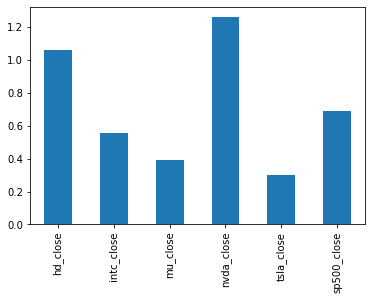

In [14]:
# Plot the sharpe ratios
sharpe_ratios.plot.bar()